In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import accuracy_score

# Random Forests Classifiers

# 1 - Without nulls

#### Read csv created in Data_preprocessing

In [2]:
treino_0null = pd.read_csv("training_0null.csv")
teste_0null = pd.read_csv("test_0null.csv")

In [3]:
treino_0null_X = treino_0null.drop(columns=['salary']) 
treino_0null_Y = treino_0null['salary']
teste_0null_X = teste_0null.drop(columns=['salary'])  
teste_0null_Y = teste_0null['salary']

#### Choose max depth

In [4]:
error_rate = []

for i in range(1,25):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(treino_0null_X,treino_0null_Y)
    predictions = clf.predict(teste_0null_X)
    error_rate.append(np.mean(predictions != teste_0null_Y))

Text(0, 0.5, 'Error Rate')

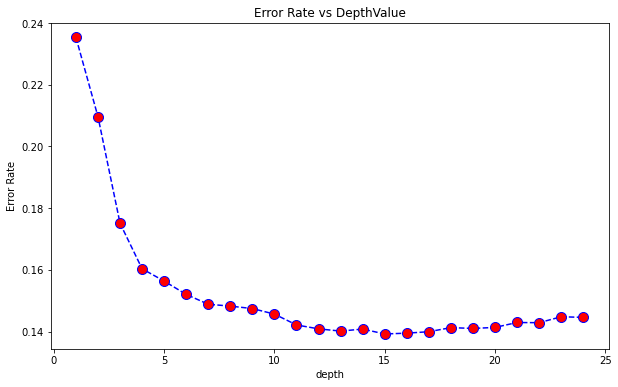

In [5]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Create a model

In [6]:
clf0Null = RandomForestClassifier(max_depth=15, random_state=0)

In [7]:
clf0Null.fit(treino_0null_X,treino_0null_Y)

RandomForestClassifier(max_depth=15, random_state=0)

In [8]:
predictions0Null = clf0Null.predict(teste_0null_X)

### Check accuracy

In [9]:
print(classification_report(teste_0null_Y,predictions0Null))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.78      0.61      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.77      0.80     15060
weighted avg       0.86      0.86      0.85     15060



In [10]:
confusionNotNull = pd.crosstab(teste_0null_Y,predictions0Null, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionNotNull)

Predicted      0     1    All
Actual                       
0          10724   636  11360
1           1461  2239   3700
All        12185  2875  15060


In [11]:
score = accuracy_score(teste_0null_Y,predictions0Null)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.860757


### Undersampling e Oversampling

In [12]:
oversample = RandomOverSampler(sampling_strategy=0.4)
treino_0null_X,treino_0null_Y = oversample.fit_resample(treino_0null_X,treino_0null_Y)

undersample = RandomUnderSampler(sampling_strategy=0.7)
treino_0null_X,treino_0null_Y = undersample.fit_resample(treino_0null_X,treino_0null_Y)

In [13]:
error_rate = []

for i in range(1,25):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(treino_0null_X,treino_0null_Y)
    predictions = clf.predict(teste_0null_X)
    error_rate.append(np.mean(predictions != teste_0null_Y))

Text(0, 0.5, 'Error Rate')

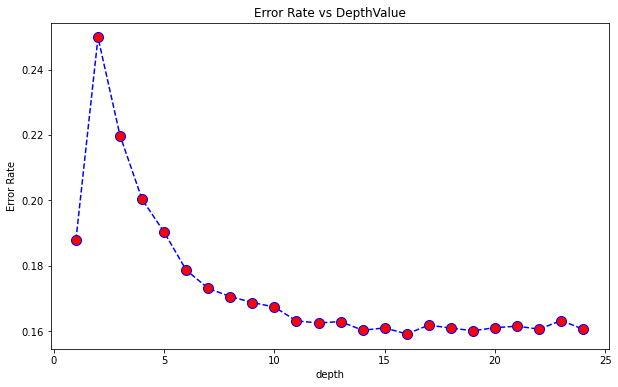

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

In [15]:
clf0Null = RandomForestClassifier(max_depth=19, random_state=0)

In [16]:
clf0Null.fit(treino_0null_X,treino_0null_Y)

RandomForestClassifier(max_depth=19, random_state=0)

In [17]:
predictions0Null = clf0Null.predict(teste_0null_X)

In [18]:
print(classification_report(teste_0null_Y,predictions0Null))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     11360
           1       0.64      0.78      0.71      3700

    accuracy                           0.84     15060
   macro avg       0.78      0.82      0.80     15060
weighted avg       0.85      0.84      0.84     15060



In [19]:
confusionNotNull = pd.crosstab(teste_0null_Y,predictions0Null, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionNotNull)

Predicted      0     1    All
Actual                       
0           9754  1606  11360
1            805  2895   3700
All        10559  4501  15060


In [20]:
score = accuracy_score(teste_0null_Y,predictions0Null)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.839907


# 2 - Mode as null values

#### Read csv created in Data_preprocessing

In [21]:
treino_mode = pd.read_csv("training_mode.csv")
teste_mode = pd.read_csv("test_mode.csv")

In [22]:
treino_mode_X = treino_mode.drop(columns=['salary']) 
treino_mode_Y = treino_mode['salary']
teste_mode_X = teste_mode.drop(columns=['salary'])  
teste_mode_Y = teste_mode['salary']

#### Choose max depth

In [23]:
error_rate2 = []

for i in range(1,25):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(treino_mode_X,treino_mode_Y)
    predictions = clf.predict(teste_mode_X)
    error_rate2.append(np.mean(predictions != teste_mode_Y))

Text(0, 0.5, 'Error Rate')

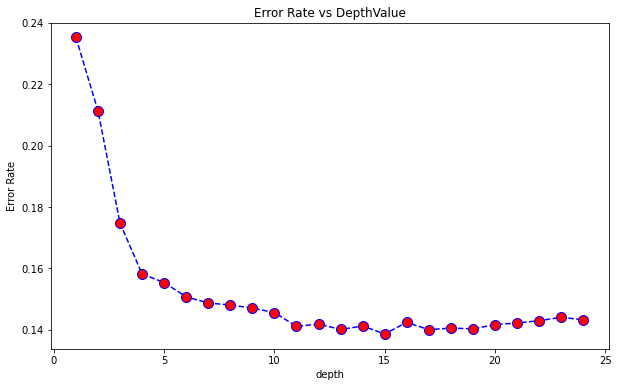

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate2,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Create a model

In [25]:
clfMode = RandomForestClassifier(max_depth=15, random_state=0)

In [26]:
clfMode.fit(treino_mode_X,treino_mode_Y)

RandomForestClassifier(max_depth=15, random_state=0)

In [27]:
predictionsMode = clfMode.predict(teste_mode_X)

### Check accuracy

In [28]:
print(classification_report(teste_mode_Y,predictionsMode))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.78      0.61      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060



In [29]:
confusionMode = pd.crosstab(teste_mode_Y,predictionsMode, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMode)

Predicted      0     1    All
Actual                       
0          10732   628  11360
1           1460  2240   3700
All        12192  2868  15060


In [30]:
from sklearn.metrics import accuracy_score
score = accuracy_score(teste_mode_Y,predictionsMode)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.861355


### Undersampling e Oversampling

In [31]:
oversample = RandomOverSampler(sampling_strategy=0.4)
treino_mode_X,treino_mode_Y = oversample.fit_resample(treino_mode_X,treino_mode_Y)

undersample = RandomUnderSampler(sampling_strategy=0.7)
treino_mode_X,treino_mode_Y = undersample.fit_resample(treino_mode_X,treino_mode_Y)

In [32]:
error_rate2 = []

for i in range(1,25):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(treino_mode_X,treino_mode_Y)
    predictions = clf.predict(teste_mode_X)
    error_rate2.append(np.mean(predictions != teste_mode_Y))

Text(0, 0.5, 'Error Rate')

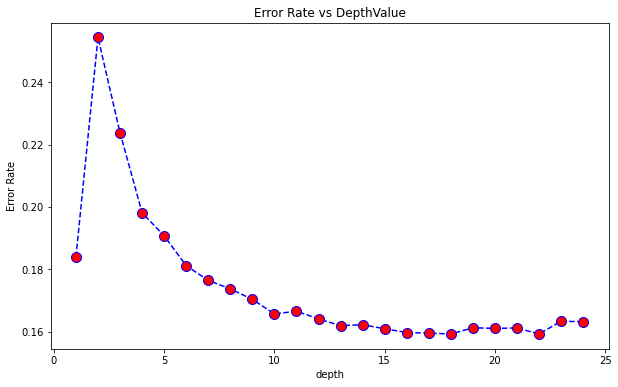

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate2,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

In [34]:
clfMode = RandomForestClassifier(max_depth=18, random_state=0)

In [35]:
clfMode.fit(treino_mode_X,treino_mode_Y)

RandomForestClassifier(max_depth=18, random_state=0)

In [36]:
predictionsMode = clfMode.predict(teste_mode_X)

In [37]:
print(classification_report(teste_mode_Y,predictionsMode))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     11360
           1       0.64      0.79      0.71      3700

    accuracy                           0.84     15060
   macro avg       0.78      0.82      0.80     15060
weighted avg       0.86      0.84      0.85     15060



In [38]:
confusionMode = pd.crosstab(teste_mode_Y,predictionsMode, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMode)

Predicted      0     1    All
Actual                       
0           9752  1608  11360
1            790  2910   3700
All        10542  4518  15060


In [39]:
score = accuracy_score(teste_mode_Y,predictionsMode)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.840770


# 3 - KNN as null values

#### Read csv created in Data_preprocessing

In [40]:
treino_knn = pd.read_csv("training_knn.csv")
teste_knn = pd.read_csv("test_knn.csv")

In [41]:
treino_knn_X = treino_knn.drop(columns=['salary']) 
treino_knn_Y = treino_knn['salary']
teste_knn_X = teste_knn.drop(columns=['salary'])  
teste_knn_Y = teste_knn['salary']

#### Choose max depth

In [42]:
error_rate3 = []

for i in range(1,25):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(treino_knn_X,treino_knn_Y)
    predictions = clf.predict(teste_knn_X)
    error_rate3.append(np.mean(predictions != teste_knn_Y))

Text(0, 0.5, 'Error Rate')

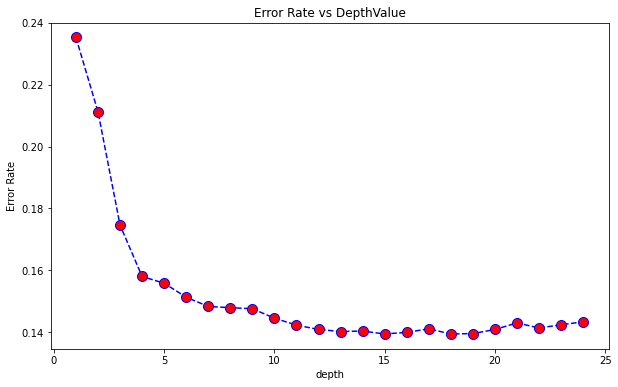

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate3,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Create a model

In [44]:
clfKNN = RandomForestClassifier(max_depth=18, random_state=0)

In [45]:
clfKNN.fit(treino_knn_X,treino_knn_Y)

RandomForestClassifier(max_depth=18, random_state=0)

In [46]:
predictionsKNN = clfKNN.predict(teste_knn_X)

### Check accuracy

In [47]:
print(classification_report(teste_knn_Y,predictionsKNN))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     11360
         1.0       0.77      0.61      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.85     15060



In [48]:
confusionKNN = pd.crosstab(teste_knn_Y,predictionsKNN, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionKNN)

Predicted    0.0   1.0    All
Actual                       
0.0        10689   671  11360
1.0         1428  2272   3700
All        12117  2943  15060


In [49]:
score = accuracy_score(teste_knn_Y,predictionsKNN)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.860624


### Undersampling e Oversampling

In [50]:
oversample = RandomOverSampler(sampling_strategy=0.4)
treino_knn_X,treino_knn_Y = oversample.fit_resample(treino_knn_X,treino_knn_Y)

undersample = RandomUnderSampler(sampling_strategy=0.7)
treino_knn_X,treino_knn_Y = undersample.fit_resample(treino_knn_X,treino_knn_Y)

In [51]:
error_rate3 = []

for i in range(1,25):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(treino_knn_X,treino_knn_Y)
    predictions = clf.predict(teste_knn_X)
    error_rate3.append(np.mean(predictions != teste_knn_Y))

Text(0, 0.5, 'Error Rate')

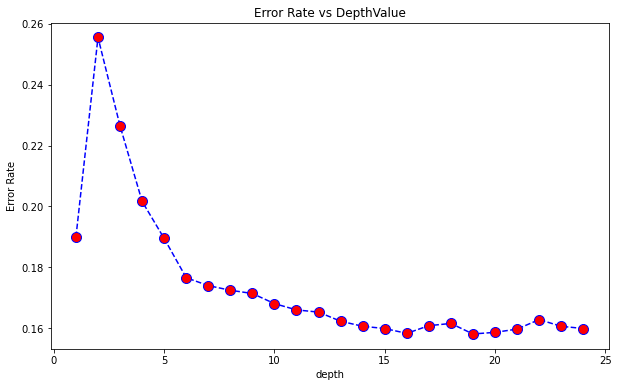

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate3,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

In [53]:
clfKNN = RandomForestClassifier(max_depth=15, random_state=0)

In [54]:
clfKNN.fit(treino_knn_X,treino_knn_Y)

RandomForestClassifier(max_depth=15, random_state=0)

In [55]:
predictionsKNN = clfKNN.predict(teste_knn_X)

In [56]:
print(classification_report(teste_knn_Y,predictionsKNN))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     11360
         1.0       0.64      0.80      0.71      3700

    accuracy                           0.84     15060
   macro avg       0.78      0.83      0.80     15060
weighted avg       0.86      0.84      0.85     15060



In [57]:
confusionKNN = pd.crosstab(teste_knn_Y,predictionsKNN, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionKNN)

Predicted    0.0   1.0    All
Actual                       
0.0         9699  1661  11360
1.0          748  2952   3700
All        10447  4613  15060


In [58]:
score = accuracy_score(teste_knn_Y,predictionsKNN)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.840040


# 4 - No null but using scale instead of ints

#### Read csv created in Data_preprocessing

In [59]:
treino_strings = pd.read_csv("training_0null_strings.csv")
teste_strings = pd.read_csv("test_0null_strings.csv")

In [60]:
treino_strings_X = treino_strings.drop(columns=['salary']) 
treino_strings_Y = treino_strings['salary']
teste_strings_X = teste_strings.drop(columns=['salary'])  
teste_strings_Y = teste_strings['salary']

#### Scale the data

In [61]:
from sklearn import preprocessing

categorical = ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'nativecountry']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        treino_strings_X[feature] = le.fit_transform(treino_strings_X[feature])
        teste_strings_X[feature] = le.transform(teste_strings_X[feature])

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

treino_strings_X = pd.DataFrame(scaler.fit_transform(treino_strings_X), columns = treino_strings_X.columns)

teste_strings_X = pd.DataFrame(scaler.transform(teste_strings_X), columns = teste_strings_X.columns)

#### Choose max depth

In [63]:
error_rate4 = []

for i in range(1,30):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(treino_strings_X,treino_strings_Y)
    predictions = clf.predict(teste_strings_X)
    error_rate4.append(np.mean(predictions != teste_strings_Y))

Text(0, 0.5, 'Error Rate')

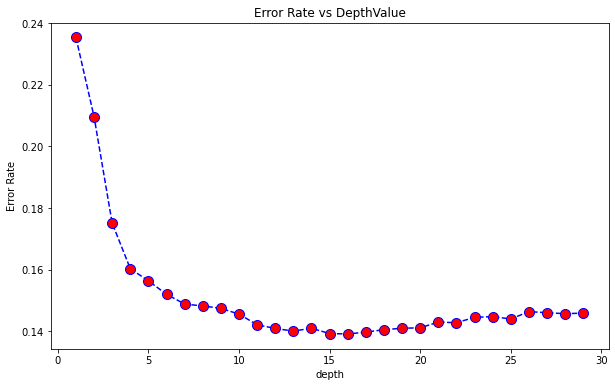

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate4,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Create a model

In [65]:
clfStrings = RandomForestClassifier(max_depth=15, random_state=0)

In [66]:
clfStrings.fit(treino_strings_X,treino_strings_Y)

RandomForestClassifier(max_depth=15, random_state=0)

In [67]:
predictionsStrings = clfStrings.predict(teste_strings_X)

### Check accuracy

In [68]:
print(classification_report(teste_strings_Y,predictionsStrings))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.78      0.61      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.77      0.80     15060
weighted avg       0.86      0.86      0.85     15060



In [69]:
confusionStrings = pd.crosstab(teste_strings_Y,predictionsStrings, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionStrings)

Predicted      0     1    All
Actual                       
0          10723   637  11360
1           1461  2239   3700
All        12184  2876  15060


In [70]:
score = accuracy_score(teste_strings_Y,predictionsStrings)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.860691


### Undersampling e Oversampling

In [71]:
oversample = RandomOverSampler(sampling_strategy=0.4)
treino_strings_X,treino_strings_Y = oversample.fit_resample(treino_strings_X,treino_strings_Y)

undersample = RandomUnderSampler(sampling_strategy=0.7)
treino_strings_X,treino_strings_Y = undersample.fit_resample(treino_strings_X,treino_strings_Y)

In [72]:
error_rate5 = []

for i in range(1,30):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(treino_strings_X,treino_strings_Y)
    predictions = clf.predict(teste_strings_X)
    error_rate5.append(np.mean(predictions != teste_strings_Y))

Text(0, 0.5, 'Error Rate')

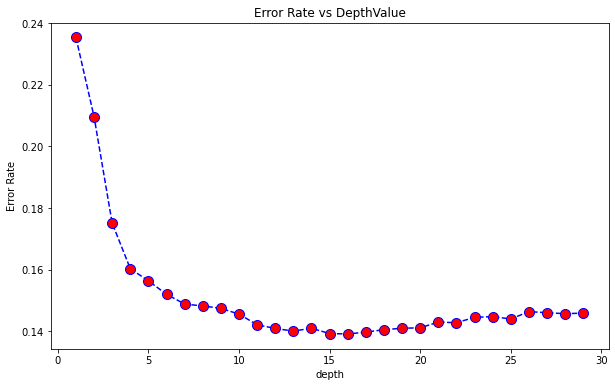

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate4,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

In [74]:
clfStrings = RandomForestClassifier(max_depth=20, random_state=0)

In [75]:
clfStrings.fit(treino_strings_X,treino_strings_Y)

RandomForestClassifier(max_depth=20, random_state=0)

In [76]:
predictionsStrings = clfStrings.predict(teste_strings_X)

In [77]:
print(classification_report(teste_strings_Y,predictionsStrings))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     11360
           1       0.64      0.78      0.70      3700

    accuracy                           0.84     15060
   macro avg       0.78      0.82      0.80     15060
weighted avg       0.85      0.84      0.84     15060



In [78]:
confusionStrings = pd.crosstab(teste_strings_Y,predictionsStrings, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionStrings)

Predicted      0     1    All
Actual                       
0           9762  1598  11360
1            827  2873   3700
All        10589  4471  15060


In [79]:
score = accuracy_score(teste_strings_Y,predictionsStrings)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.838977
